In [24]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split # Sklearn package's randomized data splitting function


# Command to tell Python to actually display the graphs
%matplotlib inline

df = pd.read_csv("./insurance.csv")

print(df.shape)

print(df.dtypes)


(1338, 7)
age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object


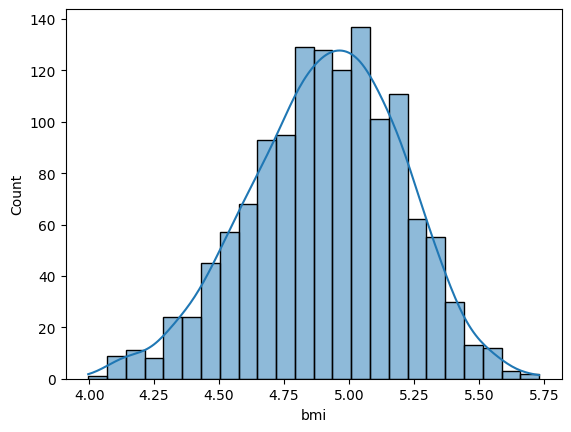

In [18]:
df2 = df.copy();

df2["bmi"] = df2["bmi"].apply(lambda x: np.log2(x))

sns.histplot(data=df2, x='bmi',kde = True);

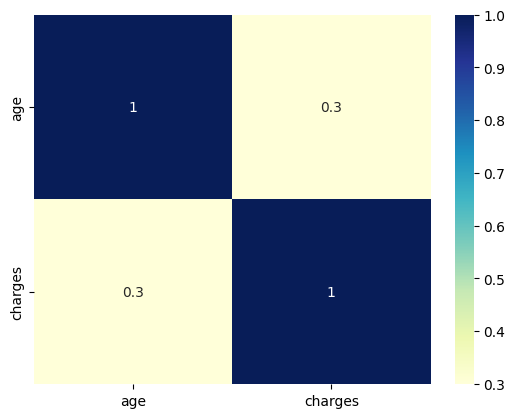

In [19]:
sns.heatmap(data=df[['age', 'charges']].corr(), annot=True, cmap='YlGnBu');

In [21]:
pd.get_dummies(df, columns=['region'])

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,female,27.900,0,yes,16884.92400,False,False,False,True
1,18,male,33.770,1,no,1725.55230,False,False,True,False
2,28,male,33.000,3,no,4449.46200,False,False,True,False
3,33,male,22.705,0,no,21984.47061,False,True,False,False
4,32,male,28.880,0,no,3866.85520,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,10600.54830,False,True,False,False
1334,18,female,31.920,0,no,2205.98080,True,False,False,False
1335,18,female,36.850,0,no,1629.83350,False,False,True,False
1336,21,female,25.800,0,no,2007.94500,False,False,False,True


In [22]:
pd.get_dummies(df, columns=['region'], drop_first=True)

,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest
0,19,female,27.900,0,yes,16884.92400,False,False,True
1,18,male,33.770,1,no,1725.55230,False,True,False
2,28,male,33.000,3,no,4449.46200,False,True,False
3,33,male,22.705,0,no,21984.47061,True,False,False
4,32,male,28.880,0,no,3866.85520,True,False,False
...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,10600.54830,True,False,False
1334,18,female,31.920,0,no,2205.98080,False,False,False
1335,18,female,36.850,0,no,1629.83350,False,True,False
1336,21,female,25.800,0,no,2007.94500,False,False,True


In [91]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
data = df.copy();

# independant variables
X = pd.get_dummies(data, columns=['region', 'sex', 'smoker']).drop(['charges'], axis=1)
# the dependent variable
y = data[['charges']]

# Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

model.fit(X_train, y_train)

print(model.intercept_)


[321.15345829]


In [92]:
model.score(X_train, y_train)

0.7545557492633161

In [94]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, interaction_only=True)
X_train2 = poly.fit_transform(X_train)
X_test2 = poly.fit_transform(X_test)

model.fit(X_train2, y_train)

y_pred = model.predict(X_test2)

#print(y_pred)

#In sample (training) R^2 will always improve with the number of variables!
print(model.score(X_train2, y_train))

0.8436747360087882


In [93]:
from sklearn.metrics import mean_absolute_error

y_pred = model.predict(X_test)
mean_absolute_error(y_test, y_pred)


4139.932064766011

### ANSWERS:

In [95]:
df=pd.read_csv('insurance.csv')

df.shape

df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

<Axes: xlabel='bmi_log', ylabel='Count'>

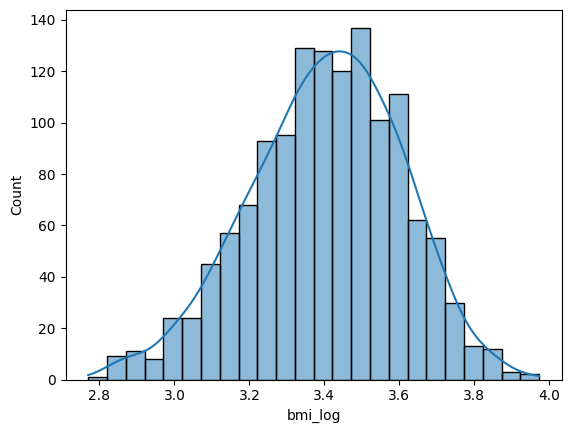

In [96]:
df['bmi_log'] = np.log(df.bmi)
sns.histplot(data=df, x='bmi_log', kde=True)

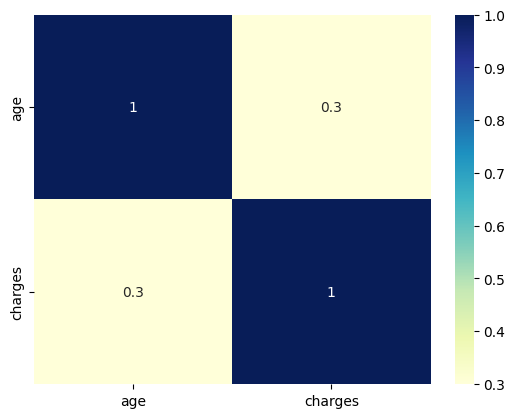

In [105]:
sns.heatmap(data=df[['age', 'charges']].corr(), annot=True, cmap='YlGnBu');

In [106]:
df = pd.get_dummies(df, columns=['sex','smoker','region'], drop_first=True)
df.head()

,age,bmi,children,charges,bmi_log,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,3.328627,False,True,False,False,True
1,18,33.770,1,1725.55230,3.519573,True,False,False,True,False
2,28,33.000,3,4449.46200,3.496508,True,False,False,True,False
3,33,22.705,0,21984.47061,3.122585,True,False,True,False,False
4,32,28.880,0,3866.85520,3.363149,True,False,True,False,False


In [113]:
import statsmodels.api as sm

X = df.drop(['charges', 'bmi_log'],axis=1)
X = sm.add_constant(X)
y = df['charges']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

x_test.shape

ModuleNotFoundError: No module named 'statsmodels'

In [108]:
from sklearn.linear_model import LinearRegression

# Create and fit the linear regression model
lr_sklearn = LinearRegression()
lr_sklearn.fit(x_train, y_train)

# Print the model intercept
print("Intercept:", lr_sklearn.intercept_)

NameError: name 'x_train' is not defined

In [ ]:
lr_sklearn.score(x_train, y_train)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

from sklearn import linear_model

 

poly = PolynomialFeatures(degree=2, interaction_only=True)

X_train2 = poly.fit_transform(x_train)

X_test2 = poly.fit_transform(x_test)

 

poly_clf = linear_model.LinearRegression()

 

poly_clf.fit(X_train2, y_train)

 

#In sample (training) R^2 will always improve with the number of variables!

print(poly_clf.score(X_train2, y_train))

In [ ]:
from sklearn.metrics import mean_absolute_error
#predicting on the test set
y_pred = lr_sklearn.predict(x_test)

#calculating MAE
mean_absolute_error(y_test, y_pred)

In [ ]:
#Out off sample (testing) R^2 
print(poly_clf.score(X_test2, y_test))